In [6]:
import pandas as pd
import numpy as np
import requests
import folium
import seaborn as sns
import matplotlib.ticker as ticker
import json
import geopandas as gdp
from langdetect import detect
from math import floor
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from assignment1_preprocessing import train_df

In [7]:
scaler = StandardScaler()
scaler.fit_transform(train_df[['target']])

array([[-0.80721948],
       [ 0.13678594],
       [ 0.81107553],
       ...,
       [-0.22925698],
       [ 3.12292554],
       [-0.73015781]])

In [8]:
train_df['percentile_10'] = pd.qcut(train_df['target'], 10, labels=False)

In [9]:
train_df['percentile_10'].value_counts().sort_index()

0    697
1    623
2    650
3    972
4    335
5    811
6    646
7    496
8    708
9    557
Name: percentile_10, dtype: int64

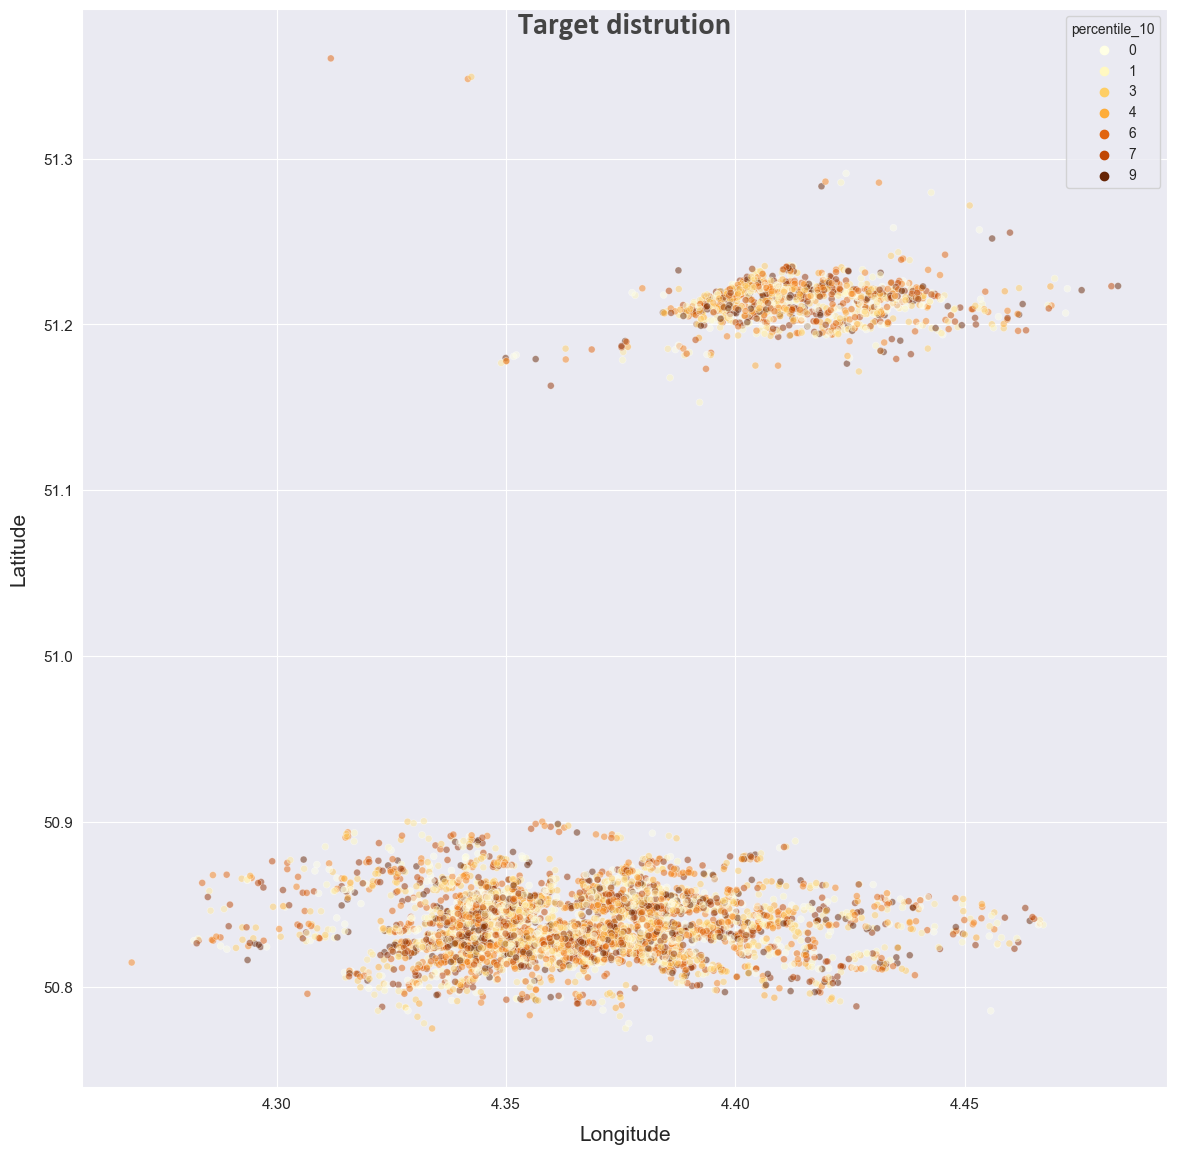

In [10]:
plt.figure(figsize=(14, 14))
plt.title('Target distrution', size=22, y=0.97, fontname='Calibri', 
          fontweight='bold', color='#444444')
a = sns.scatterplot(data = train_df, x = 'property_lon', y='property_lat', hue='percentile_10', 
                    palette=sns.color_palette('YlOrBr', as_cmap=True), s=25, alpha=0.5)
plt.xticks(size=11)
plt.yticks(size=11)
plt.xlabel('Longitude', labelpad=10, fontsize=15)
plt.ylabel('Latitude', labelpad=10, fontsize=15)
    
plt.show()

In [11]:
train_df.groupby('property_zipcode')['target'].describe().sort_values("count", ascending=False)

count       mean        std   min    25%   50%    75%  \
property_zipcode                                                           
1000              1471.0  69.785860  56.908589  10.0  40.00  55.0  80.00   
1050               960.0  67.712500  55.189130  10.0  40.00  56.0  80.00   
1060               638.0  69.617555  49.763123  17.0  40.00  59.0  82.75   
2000               455.0  68.470330  52.461090  10.0  40.00  55.0  78.50   
1030               365.0  63.939726  43.242247  15.0  36.00  55.0  80.00   
1040               319.0  67.727273  44.338367  15.0  40.00  60.0  80.00   
1190               267.0  73.749064  61.333802  12.0  40.00  60.0  85.50   
2018               254.0  65.527559  62.296604  10.0  38.00  50.0  75.75   
1180               237.0  65.232068  49.015400  12.0  40.00  52.0  75.00   
1070               185.0  64.718919  41.929637  14.0  38.00  53.0  80.00   
1210               157.0  67.757962  44.273972  16.0  40.00  56.0  85.00   
1200               137.0  63.153285  37.452105  10.0  40.00  55.0  75.00   
1080               133.0  66.729323  50.742685  16.0  39.00  55.0  75.00   
2060               117.0  71.282051  55.809072  17.0  41.00  60.0  80.00   
2140               110.0  64.154545  41.183676  15.0  37.00  50.0  80.00   
1150               101.0  59.198020  31.371012  14.0  35.00  50.0  75.00   
1020                88.0  69.363636  47.996691  20.0  40.00  58.0  85.00   
1160                86.0  63.883721  37.999201  17.0  36.50  53.5  75.00   
2600                77.0  69.740260  59.977935  17.0  40.00  50.0  79.00   
1170                66.0  76.363636  64.300888  20.0  45.00  55.0  90.00   
1140                48.0  73.312500  53.243382  19.0  45.00  54.0  78.50   
1090                42.0  66.166667  38.330983  20.0  39.25  58.0  80.00   
1081                37.0  58.648649  26.065320  19.0  45.00  50.0  75.00   
2100                30.0  69.933333  44.619412  24.0  42.50  59.5  76.25   
1083                19.0  66.421053  35.479753  10.0  45.00  60.0  80.00   
2610                15.0  54.333333  38.865458  24.0  31.00  50.0  63.00   
1082                14.0  65.357143  27.764413  25.0  47.50  63.5  81.00   
2660                13.0  73.615385  38.326532  19.0  49.00  69.0  93.00   
2020                12.0  60.250000  35.092410  25.0  34.50  57.0  70.00   
2170                10.0  60.900000  32.264359  25.0  40.00  57.5  69.00   
2050                 7.0  62.571429  46.736343  20.0  32.00  50.0  74.50   
2180                 6.0  63.500000  44.221036  30.0  37.00  54.0  59.75   
1120                 5.0  40.200000  17.035258  20.0  30.00  40.0  46.00   
1130                 4.0  45.000000  25.987176  19.0  28.75  41.0  57.25   
2040                 3.0  60.666667  10.692677  49.0  56.00  63.0  66.50   
11 20                2.0  34.000000   8.485281  28.0  31.00  34.0  37.00   
1630                 1.0  38.000000        NaN  38.0  38.00  38.0  38.00   
2008                 1.0  55.000000        NaN  55.0  55.00  55.0  55.00   
1700                 1.0  40.000000        NaN  40.0  40.00  40.0  40.00   
1620                 1.0  66.000000        NaN  66.0  66.00  66.0  66.00   
2950                 1.0  25.000000        NaN  25.0  25.00  25.0  25.00   

                    max  
property_zipcode         
1000              800.0  
1050              950.0  
1060              656.0  
2000              537.0  
1030              450.0  
1040              490.0  
1190              600.0  
2018              850.0  
1180              499.0  
1070              300.0  
1210              330.0  
1200              250.0  
1080              375.0  
2060              490.0  
2140              250.0  
1150              160.0  
1020              340.0  
1160              212.0  
2600              450.0  
1170              450.0  
1140              280.0  
1090              185.0  
1081              115.0  
2100              200.0  
1083              150.0  
2610              183.0  
1082              115.

In [12]:
emb_size = 20 
precision = 1e6 

latlon = np.expand_dims(train_df[["property_lat", "property_lon"]].values, axis=-1) 

m = np.exp(np.log(precision) / emb_size) 
angle_freq = m ** np.arange(emb_size) 
angle_freq = angle_freq.reshape(1, 1, emb_size) 

latlon = latlon * angle_freq 
latlon[..., 0::2] = np.cos(latlon[..., 0::2]) 
latlon[..., 1::2] = np.sin(latlon[..., 1::2]) 
latlon = latlon.reshape(-1, 2 * emb_size) 

In [13]:
my_link = "https://www.mapsofworld.com/postal-codes/belgium/vlaanderen/antwerpen.html"

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

r = requests.get(my_link, headers=header)

df_xyz = pd.read_html(r.text)
antwerp_zipcodes = pd.DataFrame(df_xyz[2].iloc[1:].values, columns = df_xyz[2].iloc[0].values)

In [14]:
antwerp_df = train_df[train_df.property_zipcode.isin(antwerp_zipcodes.Zipcode)]
brussels_df = train_df[~train_df.property_zipcode.isin(antwerp_zipcodes.Zipcode)]
train_df['city'] = 'Brussels'
train_df.loc[train_df.property_zipcode.isin(antwerp_zipcodes.Zipcode), 'city'] = 'Antwerp'

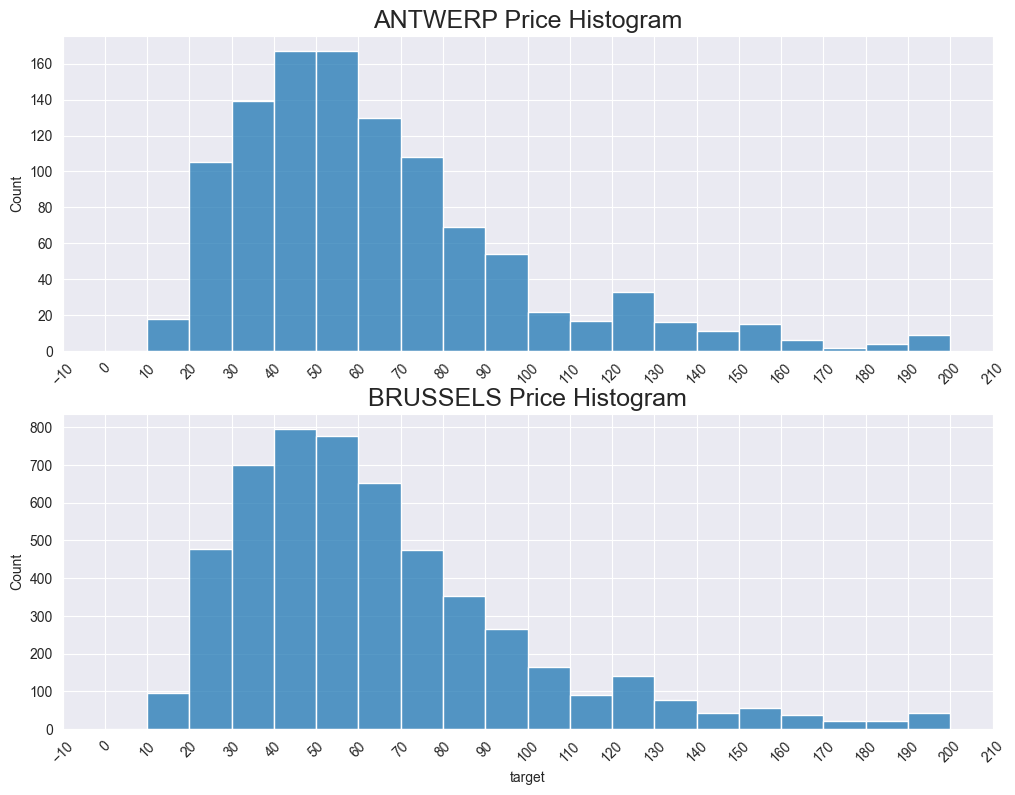

In [15]:
fig = plt.figure(figsize = (12,9))
fig.tight_layout(pad=5.0)

ax = plt.subplot(2,1,1)
sns.histplot(data = antwerp_df.target, binrange=[0,200], binwidth=10)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.xticks(rotation = 45)
plt.xlabel('')
plt.title("ANTWERP Price Histogram", size=18)

ax = plt.subplot(2,1,2)
sns.histplot(data = brussels_df.target, binrange=[0,200], binwidth=10)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.xticks(rotation = 45)
plt.title("BRUSSELS Price Histogram", size=18)

plt.show()

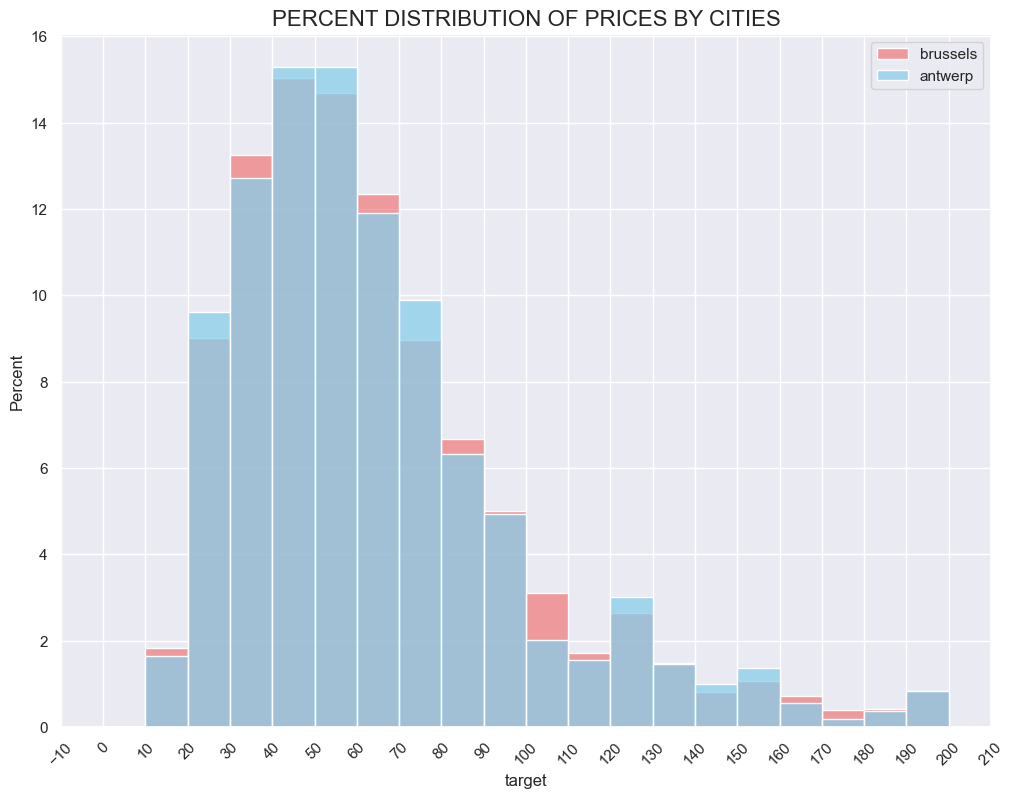

In [16]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(1,1)
fig.set_size_inches((12,9))
sns.histplot(data = brussels_df.target, binrange=[0,200], stat='percent', binwidth=10, color='lightcoral', label='brussels')
sns.histplot(data = antwerp_df.target, binrange=[0,200], stat='percent', binwidth=10, color='skyblue', label='antwerp')
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.xticks(rotation = 45)
plt.legend()
plt.title("PERCENT DISTRIBUTION OF PRICES BY CITIES", size=16)
plt.show()

histogram per number of bedrooms

In [17]:
# property_bedrooms dropped in preprocessing
temp_sns = train_df.query("property_bedrooms < 6")
g = sns.FacetGrid(temp_sns, row="property_bedrooms", col='city',sharex=False, sharey=False, aspect=3, height=2)
g.map_dataframe(sns.histplot, x = 'target',binrange = [0,200], binwidth=10)
plt.show()

UndefinedVariableError: name 'property_bedrooms' is not defined

# INTERACTIVE MAPS

In [18]:
antwerp_grouped = antwerp_df.groupby('property_zipcode')['target'].agg('mean').reset_index()
antwerp_grouped.columns = ['nouveau_PO', 'target']
antwerp_grouped.head()

nouveau_PO     target
0       2000  68.470330
1       2018  65.527559
2       2020  60.250000
3       2040  60.666667
4       2050  62.571429

In [19]:
with open("belgium_2.geojson", encoding='utf-8', errors='ignore') as json_data:
     belgium_geocode = json.load(json_data, strict=False)

In [20]:
mylist = []
for i in range(len(belgium_geocode.get("features"))):
    mylist.append(belgium_geocode.get("features")[i].get("properties").get("nouveau_PO"))
data_zipcodes = set(mylist)

In [21]:
antwerp_geocodes = [x for x in belgium_geocode.get('features') if x.get('properties').get("nouveau_PO") in antwerp_zipcodes.Zipcode.values]
brussels_geocodes = [x for x in belgium_geocode.get('features') if x.get('properties').get("nouveau_PO") in brussels_df.property_zipcode.values]

antwerp_geocodes = {"type":"FeatureCollection",
"features" : antwerp_geocodes}

brussels_geocodes = {"type":"FeatureCollection",
"features" : brussels_geocodes}

In [22]:
#antwerp_missing_zipcodes = list(set(antwerp_zipcodes.Zipcode.values).difference(antwerp_grouped.nouveau_PO))
#antwerp_grouped = pd.concat([antwerp_grouped, pd.DataFrame(antwerp_missing_zipcodes, columns=['nouveau_PO'])], ignore_index = True)

In [23]:
antwerp_map = folium.Map(location=[51.2213, 4.4051], zoom_start=12)
folium.GeoJson(antwerp_geocodes, name="geojson").add_to(antwerp_map)

In [24]:
bins = list(antwerp_grouped.target.apply(lambda x: floor(x)).quantile([0,0.25,0.5,0.75,1]))
bins[-1] = antwerp_grouped.target.max()

choropleth = folium.Choropleth(geo_data=antwerp_geocodes,
               data=antwerp_grouped, 
               columns=['nouveau_PO', 'target'], 
               key_on='feature.properties.nouveau_PO', 
               fill_color='RdBu',
               bins = bins,
               fill_opacity=0.5,
               line_opacity=0,
               legend_name='SALE PRICE',
               reset = True).add_to(antwerp_map)

In [25]:
antwerp_map

In [26]:
antwerp_map.save('antwerp_map.html')

### brussels

In [27]:
brussels_map = folium.Map(location=[50.8476, 4.3572], zoom_start=12)
folium.GeoJson(brussels_geocodes, name="geojson").add_to(brussels_map)

In [28]:
brussels_grouped = brussels_df.groupby('property_zipcode')[['target', 'property_lat', 'property_lon']].agg('median').reset_index()
brussels_grouped.columns = ['nouveau_PO', 'target', 'property_lat', 'property_lon']

bins = list(brussels_grouped.target.apply(lambda x: floor(x)).quantile([0,0.20,0.4,0.6,0.8,1]))
bins[-1] = brussels_grouped.target.max()

choropleth = folium.Choropleth(geo_data=brussels_geocodes,
               data=brussels_grouped, 
               columns=['nouveau_PO', 'target'], 
               key_on='feature.properties.nouveau_PO', 
               fill_color='RdYlGn',
               bins = bins,
               fill_opacity=0.5,
               line_opacity=0,
               legend_name='SALE PRICE',
               reset = True).add_to(brussels_map)

for i in range(0,brussels_grouped.shape[0]):
   folium.Marker(
      location=[brussels_grouped.iloc[i]['property_lat'], brussels_grouped.iloc[i]['property_lon']],
      popup=brussels_grouped.iloc[i]['nouveau_PO'],
      draggable=True
   ).add_to(brussels_map)

In [29]:
folium.LayerControl().add_to(brussels_map)
brussels_map

In [30]:
map_belgium = gdp.read_file("belgium_postaldistricts/postaldistricts.shp", SHAPE_RESTORE_SHX='YES')
map_belgium.sort_values('nouveau_PO').head()


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "fiona\ogrext.pyx", line 136, in fiona.ogrext.gdal_open_vector
  File "fiona\_err.pyx", line 291, in fiona._err.exc_wrap_pointer
fiona._err.CPLE_OpenFailedError: belgium_postaldistricts/postaldistricts.shp: No such file or directory

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\dorab\PycharmProjects\KU Leuven\2022-2023\advanced-analytics-projects\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\dorab\AppData\Local\Temp\ipykernel_25108\4133678275.py", line 1, in <module>
    map_belgium = gdp.read_file("belgium_postaldistricts/postaldistricts.shp", SHAPE_RESTORE_SHX='YES')
  File "C:\Users\dorab\PycharmProjects\KU Leuven\2022-2023\advanced-analytics-projects\venv\lib\site-packages\geopandas\io\file.py", line 259, in _read_file
    return _read_file_fiona(
  File "C:\Use

In [31]:
## 4326
map_belgium = gdp.read_file("belgium_geodata/postaldistricts.shp", SHAPE_RESTORE_SHX='YES')
map_belgium.geometry.set_crs(4326, allow_override=True)
map_belgium.sort_values('nouveau_PO').head()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "fiona\ogrext.pyx", line 136, in fiona.ogrext.gdal_open_vector
  File "fiona\_err.pyx", line 291, in fiona._err.exc_wrap_pointer
fiona._err.CPLE_OpenFailedError: belgium_geodata/postaldistricts.shp: No such file or directory

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\dorab\PycharmProjects\KU Leuven\2022-2023\advanced-analytics-projects\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\dorab\AppData\Local\Temp\ipykernel_25108\707198798.py", line 2, in <module>
    map_belgium = gdp.read_file("belgium_geodata/postaldistricts.shp", SHAPE_RESTORE_SHX='YES')
  File "C:\Users\dorab\PycharmProjects\KU Leuven\2022-2023\advanced-analytics-projects\venv\lib\site-packages\geopandas\io\file.py", line 259, in _read_file
    return _read_file_fiona(
  File "C:\Users\dorab\PycharmP

In [32]:
map_belgium[map_belgium.nouveau_PO.isin(antwerp_zipcodes.Zipcode)].plot()

NameError: name 'map_belgium' is not defined

language stuff

In [392]:
def lang_detector_func(input_text):
    if len(str(input_text)) > -1:
        return 0
    else:
        return 1

In [398]:
def lang_detector_func(x):
    try:
        if len(x) > 10:
            return detect(x)
    except:
        return np.nan

In [399]:
brussels_df.property_summary.apply(lambda x: lang_detector_func(x)).value_counts()

en       3315
fr       1812
nl         39
es         22
de         12
it         10
ca          3
pt          3
ro          2
ru          2
af          1
zh-cn       1
hu          1
da          1
tl          1
Name: property_summary, dtype: int64

In [405]:
brussels_df.loc[:,'lang_property_summary'] = brussels_df.property_summary.apply(lambda x: lang_detector_func(x))
brussels_df.loc[:,'length_property_summary'] = brussels_df.property_summary.apply(lambda x: len(str(x)))
brussels_df.insert(1, 'lang_property_summary', brussels_df.pop('lang_property_summary'))
brussels_df.insert(1, 'length_property_summary', brussels_df.pop('length_property_summary'))

/var/folders/36/jz61tnqj2nd6cp2y8_cvcdlh0000gn/T/ipykernel_64141/1221980594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brussels_df.loc[:,'lang_property_summary'] = brussels_df.property_summary.apply(lambda x: lang_detector_func(x))
/var/folders/36/jz61tnqj2nd6cp2y8_cvcdlh0000gn/T/ipykernel_64141/1221980594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brussels_df.loc[:,'length_property_summary'] = brussels_df.property_summary.apply(lambda x: len(str(x)))


In [406]:
brussels_df.query("lang_property_summary not in ('en', 'fr', 'nl')")

property_id  length_property_summary lang_property_summary  \
38             40                       26                    af   
75             77                        3                   NaN   
84             86                        3                   NaN   
87             89                       72                    es   
88             90                        3                   NaN   
...           ...                      ...                   ...   
6431         6437                        3                   NaN   
6435         6441                      394                    it   
6441         6447                        3                   NaN   
6442         6448                        3                   NaN   
6491         6497                        3                   NaN   

                                   property_name  \
38              Authentic house in Brussels city   
75                            The Cozy Apartment   
84            Appart plein de charme, bien situé   
87                        bienvenidos a Bruselas   
88           Cosy flat in the center of Brussels   
...                                          ...   
6431         Small room in a big & luminous flat   
6435  EU Area 115mq Apartment Classic Atmosphere   
6441           Cosy & Clean Flat - Louise/Cambre   
6442         Charming & Cosy flat in a Chic area   
6491         Chambre cosy dans une grande maison   

                                       property_summary  \
38                           Stunning house in Brussels   
75                                                  NaN   
84                                                  NaN   
87    decoración agradable, luminosidad de los espac...   
88                                                  NaN   
...                                                 ...   
6431                                                NaN   
6435  Il mio alloggio è vicino a Botanique, Villo! s...   
6441                                                NaN   
6442                                                NaN   
6491                                                NaN   

                                         property_space  \
38                                                  NaN   
75    Fully furnished, features Wifi, cableTV, and e...   
84    Hébergement Chaleureux et lumineux appartement...   
87                                                  NaN   
88    In the Marolles, a pittoresk neighbourhood in ...   
...                                                 ...   
6431  Chambre de 15 m2 dans un appartement de 125m2 ...   
6435  Art nouveau style, very quite and close to all...   
6441  Bright charming furnished flat located in a pr...   
6442  Bright charming furnished flat located in a pr...   
6491  Grande maison sur 4 étages dans un quartier ca...   

                                          property_desc  \
38                           Stunning house in Brussels   
75    Entièrement meublé, dispose Wifi, cableTV, et ...   
84    Hébergement Chaleureux et lumineux appartement...   
87    decoración agradable, luminosidad de los espac...   
88    In the Marolles, a pittoresk neighbourhood in ...   
...                                                 ...   
6431  Chambre de 15 m2 dans un appartement de 125m2 ...   
6435  Il mio alloggio è vicino a Botanique, Villo! s...   
6441  Bright charming furnished flat located in a pr...   
6442  Bright charming furnished flat located in a pr...   
6491  Grande maison sur 4 étages dans un quartier ca...   

                                  property_neighborhood  \
38                                                  NaN   
75                                                  NaN   
84                                                  NaN   
87                            quartier super tranquille   
88                                                  NaN   
...                                                 ...   
6431                    

In [383]:
tmp_df = train_df[~train_df.property_summary.isna()]
tmp_df[tmp_df.property_summary.apply(lambda x: len(str(x))) > 10].property_summary.apply(lambda x:detect(str(x))).value_counts()

en       4179
fr       1819
nl        207
es         29
de         15
it         10
af          4
ru          3
ca          2
pt          2
zh-cn       1
hu          1
Name: property_summary, dtype: int64

In [362]:
pd.set_option('display.max_columns', 1000)
train_df.head()

property_id                                    property_name  \
0            1                    Chambre à louer,courte durée.   
1            2  Urban Antwerp - Spacious & Authentic Herenhouse   
2            3   comfortable apartment in friendly neighborhood   
3            4                         Historical City Antwerp.   
4            5                              Antwerp center city   

                                    property_summary  \
0  Je loue une chambre dans mon appartement "atyp...   
1  Our place is a typical historic herenhuis clos...   
2  Nice and cozy apartment for couples who like t...   
3  The best place to stay if you like to be in th...   
4  Our place is right in the heart of the histori...   

                                      property_space  \
0  Espace duplex très grand et lumineux,la chambr...   
1  The spaces in our house are all large with hig...   
2  Nice proper and clean apartment. No personal s...   
3  Our rooms are nice and spacious. You stay in a...   
4  It is situated in the center if the old town. ...   

                                       property_desc  \
0  Je loue une chambre dans mon appartement "atyp...   
1  Our place is a typical historic herenhuis clos...   
2  Nice and cozy apartment for couples who like t...   
3  The best place to stay if you like to be in th...   
4  Our place is right in the heart of the histori...   

                               property_neighborhood  \
0                                                NaN   
1  Bar and restaurants One of our favourite bars ...   
2  Op 5 minuten lopen zijn er 2 gezellig stadpark...   
3    In the middle of the historical city of Antwerp   
4  The neighborhood is in the historical part of ...   

                                      property_notes  \
0                                                NaN   
1                                                NaN   
2  Public transport is next to the apartment and ...   
3  Staying in our house you have to be able to cl...   
4                                                NaN   

                                    property_transit  \
0  Accès direct de la Gare du Nord  ( 4 arrêts de...   
1  In Antwerp we have the system with rental bike...   
2  Fiets verhuur voor de deur. (dag/weekkaart) vi...   
3  Tram 10 and 11 from Central station stop in ou...   
4  The easiest is just to walk into the city ther...   

                                     property_access  \
0                                                NaN   
1  You will be able to access the following space...   
2  As a good host I trust my guest. No secrets an...   
3  Beside your own room you can relax in the down...   
4  You will enter the house through the Downstair...   

                                property_interaction  \
0  Je suis entièrement disponible pour tout échan...   
1  We are always available to help and assist whe...   
2  Ik ben altijd bereikbaar voor vragen, maar ben...   
3  We will be available to let you know where wha...   
4  I will be present to help you out with any kin...   

                                      property_rules property_zipcode  \
0                                                NaN              NaN   
1                                                NaN             2600   
2                                                NaN             2018   
3  Respectful towards other guest and host! No pets!             2000   
4  Respect to other guests and host! And keep the...             2000   

   property_lat  property_lon property_type property_room_type  \
0     50.858451      4.376594     Apartment       Private room   
1     51.194744      4.413748         House    Entire home/apt   
2     51.192501      4.409351   Condominium    Entire home/apt   
3     51.220145      4.405446         House       Private room   
4     51.222028      4.404945         House       Private room   

   property_max_guests  property_bathrooms  property_bedrooms  prope

'property_summary'  
'property_space'

       'property_desc', 'property_neighborhood', 'property_notes',
       'property_transit', 'property_access', 'property_interaction',
       'property_rules', 'property_zipcode', 'property_lat', 'property_lon',
       'property_type', 'property_room_type', 'property_max_guests',
       'property_bathrooms', 'property_bedrooms', 'property_beds',
       'property_bed_type', 'property_amenities', 'property_sqfeet',
       'property_scraped_at', 'property_last_updated', 'host_id', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_nr_listings', 'host_nr_listings_total',
       'host_verified', 'booking_price_covers', 'booking_min_nights',
       'booking_max_nights', 'booking_availability_30',
       'booking_availability_60', 'booking_availability_90',
       'booking_availability_365', 'booking_cancel_policy', 'reviews_num',
       'reviews_first', 'reviews_last', 'reviews_rating', 'reviews_acc',
       'reviews_cleanliness', 'reviews_checkin', 'reviews_communication',
       'reviews_location', 'reviews_value', 'reviews_per_month', 'extra',
       'target', 'property_last_updated_dt', 'percentile_10', 'city']

In [363]:
train_df.columns

Index(['property_id', 'property_name', 'property_summary', 'property_space',
       'property_desc', 'property_neighborhood', 'property_notes',
       'property_transit', 'property_access', 'property_interaction',
       'property_rules', 'property_zipcode', 'property_lat', 'property_lon',
       'property_type', 'property_room_type', 'property_max_guests',
       'property_bathrooms', 'property_bedrooms', 'property_beds',
       'property_bed_type', 'property_amenities', 'property_sqfeet',
       'property_scraped_at', 'property_last_updated', 'host_id', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_nr_listings', 'host_nr_listings_total',
       'host_verified', 'booking_price_covers', 'booking_min_nights',
       'booking_max_nights', 'booking_availability_30',
       'booking_availability_60', 'booking_availability_90',
       'booking_availability_365', 'booking_cancel_policy', 'reviews_num',
       'reviews_first', 're

In [412]:
pd.DataFrame(brussels_df.property_last_updated_dt.dt.month + brussels_df.property_last_updated_dt.dt.year*100).value_counts()

property_last_updated_dt
201705                      2362
201704                      1195
201701                       339
201702                       236
201703                       185
201612                       106
201607                        95
201608                        84
201606                        80
201611                        77
201603                        71
201609                        70
201602                        67
201610                        60
201508                        52
201601                        45
201605                        45
201509                        45
201604                        43
201512                        31
201511                        28
201507                        27
201510                        26
201506                        14
201505                        11
201504                         3
201503                         3
201502                         3
201405                         3
201501            

array([[<AxesSubplot:title={'center':'target'}>]], dtype=object)

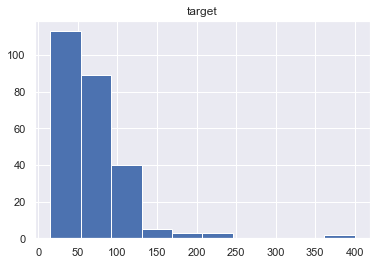

In [414]:
brussels_df.query("property_last_updated_dt < '2016-01-01'").hist('target')

In [408]:
brussels_df.query("property_bedrooms == 4 and target < 40")

property_id  length_property_summary lang_property_summary  \
577           579                      494                    fr   
632           635                        1                   NaN   
713           716                      254                    fr   
763           766                      308                    en   
827           830                      250                    en   
956           959                      211                    fr   
1355         1359                      368                    fr   
2891         2896                      439                    en   
2993         2998                      240                    en   
3110         3115                      210                    en   
3754         3759                      274                    fr   
3930         3935                      250                    en   
4210         4215                      239                    en   
4330         4335                       68                    en   
4929         4935                      241                    en   
5295         5301                      107                    fr   
5507         5513                      184                    fr   

                                          property_name  \
577   BXL - QUARTIER EUROPÉEN  1 ou 2 ROOMS ou EN EN...   
632        12 people apt city centre, close to stations   
713       Appartement familial 4 chambres//Gare du midi   
763                         Charming 4BR house in Uccle   
827                 4 bedrooms - 180 m2, on Toison d'Or   
956                  Belle maison familiale avec jardin   
1355                                    MY FAMILY HOUSE   
2891      Calm City House with garden and light - 220m2   
2993                     Charming family house in Uccle   
3110    Entire townhouse close to the St-Guidon metro!!   
3754           Modern Penthouse - Best view of Brussels   
3930                Cozy Family Loft + Guest Suite (8p)   
4210                   3.5 Floor apartment with terrace   
4330                 House in Brussels (metro & forest)   
4929                Comfortable Family house in Ixelles   
5295                    Rent a nice house with garden !   
5507                      Villa dans quartier verdoyant   

                                       property_summary  \
577   Duplex à louer en entier ou chambre par chambr...   
632                                                   ;   
713   Notre Duplex est situé aux 1er et 2ème étages ...   
763   This charming townhouse, located in the desira...   
827   Prestigious, renovated 180m2 flat with 4 bedro...   
956   Idéalement située dans une rue calme et boisée...   
1355  Mon logement est proche du Musée Horta , de la...   
2891  City House with Garden ( 4 floors), 1 minute w...   
2993  Cosy and charming four flours family house. Fu...   
3110  Nice typical Brussels' style townhouse, in Bru...   
3754  Penthouse situé dans un immeuble chic et calme...   
3930  Our luminous cozy home, a ten minute walk from...   
4210  In the heart of Ixelles near the vibrating Pla...   
4330  This is our house, which we ocassionally rent ...   
4929  We bought this house a few years ago, and are ...   
5295  Maison avec jardin dans un quartier calme de l...   
5507  Villa familiale très lumineuse avec grande piè...   

                                         property_space  \
577   Attention : réduction de frais pour les longue...   
632                                                 NaN   
713   Appartement de 230 m2 : au 1er : cuisine ouver...   
763                                                 NaN   
827   Tintin and the Golden Fleece (Toison D'Or) are...   
956   Vous voulez du calme et du vert tout en étant ...   
1355                                                NaN   
2891  The house is a 4 story house with one floor fo...   
2993  The living room has a 5,20m high ceiling and a...   
3110  The house is a typical Brussels red brick town...   
3754  